In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


%matplotlib notebook

In [2]:

# Load iris dataset
from sklearn.datasets import load_iris

iris=load_iris()
#print(iris.DESCR)




In [11]:
X,y=iris.data,iris.target
names = iris.feature_names

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=0)
#Y_test

from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import  linear
lr = LinearRegression()

# Training/Fitting the Model
lr.fit(X_train, y_train)

# Making Predictions
lr.predict(X_test)
Y_pred = lr.predict(X_test)



In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, Y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, Y_pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, Y_pred)))

Mean Absolute Error: 0.2112698081154823
Mean Squared Error: 0.061480291624700444
Mean Root Squared Error: 0.24795219624899564


In [5]:
#Y_train

In [6]:

#Function to calculate Mean Square Error
def lst_sq(predictions, target):
    return 0.5 * np.sum((predictions - target)**2)
#print(lst_sq)

#Function to calculate weight using Stocastic Gradient Descent
def sgd_step(predictions, target, data, alpha=0.01):
    diff = predictions - target
    update = diff @ data
    w_new = w - alpha * update
    
    return w_new

In [7]:
#Split training data into batches (Each batch of size 32)
batch_size = 32
count = 100

X_train_batch = [X_train[i: i + batch_size] for i in range(0, len(X_train), batch_size)]
#print(X_train_batch)
Y_train_batch = [y_train[j: j + batch_size] for j in range(0, len(y_train), batch_size)]
#print(y_train_batch)

In [8]:
#Define List of all possible pairs of input data

from itertools import combinations
all_combinations = list(combinations(list(range(3, -1 , -1)), 2)) + list(combinations(list(range(4)),2))
print(all_combinations)




[(3, 2), (3, 1), (3, 0), (2, 1), (2, 0), (1, 0), (0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


<IPython.core.display.Javascript object>


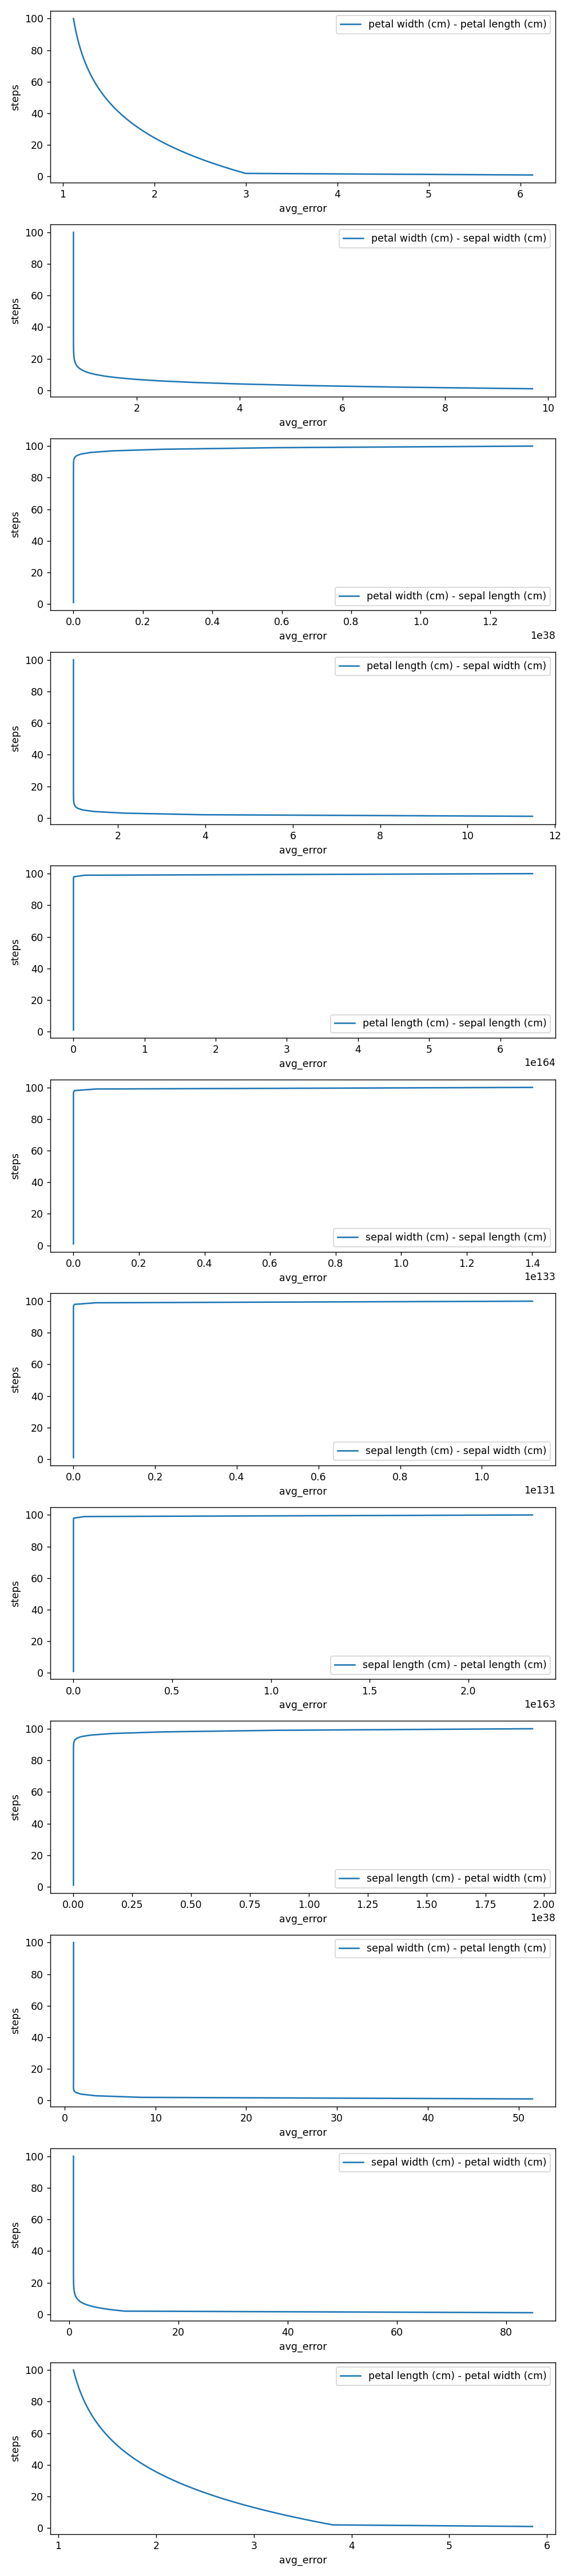

Test output for model : petal width (cm) - petal length (cm)
Error for testing dataset : 0.39911993575633714
Test output for model : petal width (cm) - sepal width (cm)
Error for testing dataset : 0.3008798676328627
Test output for model : petal width (cm) - sepal length (cm)
Error for testing dataset : 6.07617982558103e+37
Test output for model : petal length (cm) - sepal width (cm)
Error for testing dataset : 0.681011167177969
Test output for model : petal length (cm) - sepal length (cm)
Error for testing dataset : 2.5625057981283857e+164
Test output for model : sepal width (cm) - sepal length (cm)
Error for testing dataset : 9.02936876756987e+132
Test output for model : sepal length (cm) - sepal width (cm)
Error for testing dataset : 7.244902938760748e+130
Test output for model : sepal length (cm) - petal length (cm)
Error for testing dataset : 9.229930720723319e+162
Test output for model : sepal length (cm) - petal width (cm)
Error for testing dataset : 8.96275370677137e+37
Test ou

In [9]:

fig = plt.figure(figsize=[8, 36])
for i, tup in enumerate(all_combinations):
    #Use random weights [w0 , w1] for each model
    w = np.random.uniform(-1, 1, 2)
    ax = fig.add_subplot(12,1, i+1)
    ax.set_xlabel('avg_error')
    ax.set_ylabel('steps')
    error_avg_list = []
    
    for n in range(count):
        
        error_sum = 0
        for batch_index in range(len(X_train_batch)):
            batch_data = X_train_batch[batch_index][:, tup]
            batch_target = Y_train_batch[batch_index]
            batch_Y_hat = batch_data @ w
            batch_error = lst_sq(batch_Y_hat, batch_target)
            error_sum += batch_error
            w = sgd_step(batch_Y_hat, batch_target, batch_data, alpha=0.002)
        
        error_avg = error_sum/len(X_train_batch)
        error_avg_list.append(error_avg)
    
    #Testing the model 
    print('Test output for model : {}'.format(names[tup[0]] + ' - ' + names[tup[1]]))
    
    test_Y_hat = X_test[:, tup] @ w
    test_error = lst_sq(test_Y_hat, y_test)
    
    print('Error for testing dataset : {}'.format(test_error))
    
    ax.plot(error_avg_list, np.linspace(1, 100, 100), label=names[tup[0]] + ' - ' + names[tup[1]])
    ax.legend(loc='best')
            
fig.tight_layout()
fig.savefig('linear_regression_training_plot.png')

In [10]:

w_reg = w_non_reg = np.random.uniform(-1, 1, 2)
regularization = 1
custom_tup = (3,2)

non_reg_error_sum = 0
reg_error_sum = 0
for batch_index in range(len(X_train_batch)):
    batch_data = X_train_batch[batch_index][:, custom_tup]
    batch_target = Y_train_batch[batch_index]
    reg_batch_Y_hat = batch_data @ w_reg
    non_reg_batch_Y_hat = batch_data @ w_non_reg
    reg_error = lst_sq(reg_batch_Y_hat, batch_target)
    non_reg_error = lst_sq(non_reg_batch_Y_hat, batch_target)

    reg_error_sum += reg_error
    non_reg_error_sum += non_reg_error
    
    w_reg = np.linalg.inv(regularization * np.eye(batch_data.shape[1]) + batch_data.T @ batch_data) @ (batch_data.T @ batch_target)
    w_non_reg = np.linalg.inv(batch_data.T @ batch_data) @ (batch_data.T @ batch_target)
        
reg_error_avg = reg_error_sum/len(X_train_batch)
non_reg_error_avg = non_reg_error_sum/len(X_train_batch)

print('Weight with regularization : {} and error : {}'.format(w_reg, reg_error_avg))
print('Weight without regularization : {} and error : {}'.format(w_non_reg, non_reg_error_avg))

Weight with regularization : [0.37447508 0.17742636] and error : 5.450424491552613
Weight without regularization : [ 1.82519149 -0.34976661] and error : 5.354705977170357
